## pyKO Test 2
### Ideal gas Sod tube problem, planar, fixed end points

Compare pyKO to analytic solution and fKO.

NOTE: fortran version currently hard-coded to 500 nodes for these tests. Edit and recompile if needed.
Fortran is hard-coded for a factor of 6 reduction in time steps. 
Fortran version does not set internal energy at time 0.

pyKO documentation: https://impactswiki.github.io/pyko

Set the path to pyko and your fortran compiler in import-modules.py file

Sarah T. Stewart<br>
June 27, 2023<br>
July 5, 2023 v0.6.1 updates<br>

In [1]:
# import the same set of modules for each test run provided with pyKO
%run import-modules

Platform:  Darwin Kernel Version 22.5.0: Thu Jun  8 22:21:34 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T8112
python version:  3.11.4
matplotlib version:  3.7.1
hvplot version:  0.8.4
numpy version:  1.25.0
pandas version:  2.0.2
pickle version:  4.0
yaml version:  6.0
pint version:  0.22
pyko version:  v0.6.1-2023-07-04

/usr/local/bin/gfortran

GNU Fortran (GCC) 12.1.0
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.




In [2]:
## sod shock analytic solution
# sodshock requires scipy and numpy
# sodshock python module from https://github.com/ibackus/sod-shocktube
import sodshock
#

## Check the input file


In [3]:
# path to the input file
filein = './test2/test2-idg.yml'

# initialize the run class variable by loading the configuration file
run = RunClass(fin=filein)
# print the run class state; this will print in code units
run.checkinput()
# the output filename is run.outputfilename

Key nrhomin does not exist. Using default 0.8
Key nrhomin does not exist. Using default 0.8

pyKO v0.6.1-2023-07-04 run parameters
   All outputs are in code units 
   Input file: ./test2/test2-idg.yml 
   Output file: ./test2/pyko-test2-idg-bin.dat 
   Number of materials: 2 
   Number of nodes in each material: [200 300] 
   Length of each material: [2. 3.] 
   Initial left edge of each material: [0. 2.] 
   Boundary conditions: ['FIXED', 'FIXED']
   Material EOS:     ['IDG', 'IDG'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        0.39999999999999997

mat1: Hydrodynamic material

mat1 Fracture parameters [code units]: 
   Fracture pressure: 0.0 
   Fracture maximum distension (rhomin/rhoref): 0.8

Class Ideal Gas [code units]: IDG 1 
   gamma0: 1.4 
   cv: 25.000000000000004 
   initial state: 
       rho0: 10.000000000000002 
       p0:   100.00000000000001 
       iev0: 250.00000000000006 
       up0:  0.0

### Ideal gas unit conversion

The KO input file is in code units, including heat capacity. 

This returns temperatures that are consistent between fKO, pyKO, and sodshock.py

The next 2 cells convert ideal gas mks units to code units to reproduce the example in sodshock

In [4]:
# LAYER 1 LEFT
# what are the units for ideal gas
# P=nRT/V

# N2
# diatomic c_v = 5/2 R
# c_p = c_v + R
# gamma = c_p/c_v = 1.4

# P = 0.01 Mbar = 1 GPa
# T = 300 K
# P = R rho T
# R = 8.314 J/K/mol = m3⋅Pa⋅K−1⋅mol−1
# N2 = 14.0067*2 g/mol

# rho = P / (R T) = 1e9 / (8.314 * 300) * 14.0067*2 /1000 /1.e6 = 400930 mol/m3 * g/mol kg/g m3/(100^3)cm3 = 0.01123 g/cm3

# P0 = 0.01 Mbar
# rho0 = 0.01123 g/cm3
# E = cv * T
# E = 5/2 * 8.314 /(14.0067*2) = J/K/mol * mol/g 


# N2
# MKS first and then convert to code units
R = 8.314 # J/K/mol =  m3 Pa / (K mol)
#g_per_mole = .8315 # g/mol 
g_per_mole = .00008315 # g/mol for N2.
kg_per_mole = g_per_mole/1000. # kg/mol 
atoms_per_mol = 2. # atoms per molecule
cv = 5./2.*R # diatomic   m3 Pa / (K mol)
cp = cv + R
gamma = cp/cv
T = 10 # K room temp initial state
P = 100e11 # Pa
rho = P / (R * T) * kg_per_mole # kg/m3
E = P/(gamma-1.)/rho # kg m/s2 /m2 * m3/kg == m2/s2 (specific internal energy)
cv_sp = cv / (kg_per_mole) # J/K/kg
print('T=',E/cv_sp)
print('mks units rho, gamma, P, T, cv_sp, E, E/cv_sp = ',rho,gamma,P,T,cv_sp,E,E/cv_sp)

# convert to code units
eu = 100e3 # J -> eu ; code energy unit eu = 100 kJ
P_code = P/1.e11 # Pa -> Mbar
rho_code = rho/1000. # kg/m3 ->> g/cm3

E_code = E*rho / 1.e11 # eu/cm3 = 100 GJ/m3
cv_code = cv_sp * rho /1.e11 # eu/K/cm3 = 100 GJ/K/m3

print('code units rho, gamma, P, cv_sp, E = ',rho_code,gamma,P_code,cv_code,E_code)
print(E_code/cv_code)

T= 10.000000000000004
mks units rho, gamma, P, T, cv_sp, E, E/cv_sp =  10001.202790473899 1.4 10000000000000.0 10 249969933.85447985 2499699338.5447993 10.000000000000004
code units rho, gamma, P, cv_sp, E =  10.001202790473899 1.4 100.0 25.0 250.00000000000009
10.000000000000004


In [5]:
## Layer 2 right

# what are the units for ideal gas
# P=nRT/V

# N2
# diatomic c_v = 5/2 R
# c_p = c_v + R
# gamma = c_p/c_v = 1.4

# P = 0.01 Mbar = 1 GPa
# T = 300 K
# P = R rho T
# R = 8.314 J/K/mol = m3⋅Pa⋅K−1⋅mol−1
# N2 = 14.0067*2 g/mol

# rho = P / (R T) = 1e9 / (8.314 * 300) * 14.0067*2 /1000 /1.e6 = 400930 mol/m3 * g/mol kg/g m3/(100^3)cm3 = 0.01123 g/cm3

# P0 = 0.01 Mbar
# rho0 = 0.01123 g/cm3
# E = cv * T
# E = 5/2 * 8.314 /(14.0067*2) = J/K/mol * mol/g 


# N2
# MKS first and then convert to code units
R = 8.314 # J/K/mol =  m3 Pa / (K mol)
g_per_mole = .00008315 # g/mol for N2.
kg_per_mole = g_per_mole/1000. # kg/mol for N2.
atoms_per_mol = 2. # atoms per molecule
cv = 5./2.*R # diatomic   m3 Pa / (K mol)
cp = cv + R
gamma = cp/cv
T = 1. # K room temp initial state
P = 1.e11 # Pa
rho = P / (R * T) * kg_per_mole # kg/m3
E = P/(gamma-1.)/rho # kg m/s2 /m2 * m3/kg == m2/s2 (specific internal energy)
cv_sp = cv / (kg_per_mole) # J/K/kg
print('T=',E/cv_sp)
print('mks units rho, gamma, P, T, cv_sp, E, E/cv_sp = ',rho,gamma,P,T,cv_sp,E,E/cv_sp)

# convert to code units
eu = 100e3 # J; code energy unit eu = 100 kJ
P_code = P/1.e11 # Mbar
rho_code = rho/1000. # g/cm3

E_code = E*rho / 1.e11 # eu/cm3 = 100 GJ/m3
cv_code = cv_sp * rho /1.e11 # eu/K/cm3 = 100 GJ/K/m3

print('code units rho, gamma, P, cv_sp, E = ',rho_code,gamma,P_code,cv_code,E_code)
print(E_code/cv_code)

T= 1.0000000000000004
mks units rho, gamma, P, T, cv_sp, E, E/cv_sp =  1000.1202790473899 1.4 100000000000.0 1.0 249969933.85447985 249969933.85447994 1.0000000000000004
code units rho, gamma, P, cv_sp, E =  1.00012027904739 1.4 1.0 2.4999999999999996 2.5000000000000004
1.0000000000000004


### Run python KO

Fortan version uses an initial time step of 0.001 microseconds; set as input here for code comparison.

Otherwise pyKO has an initialization section that estimates a good first time step


In [6]:

%time pyko.run(fin=filein,userdtstart=0.001,verbose=True)

Key nrhomin does not exist. Using default 0.8
Key nrhomin does not exist. Using default 0.8

pyKO v0.6.1-2023-07-04 run parameters
   All outputs are in code units 
   Input file: ./test2/test2-idg.yml 
   Output file: ./test2/pyko-test2-idg-bin.dat 
   Number of materials: 2 
   Number of nodes in each material: [200 300] 
   Length of each material: [2. 3.] 
   Initial left edge of each material: [0. 2.] 
   Boundary conditions: ['FIXED', 'FIXED']
   Material EOS:     ['IDG', 'IDG'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        0.39999999999999997

mat1: Hydrodynamic material

mat1 Fracture parameters [code units]: 
   Fracture pressure: 0.0 
   Fracture maximum distension (rhomin/rhoref): 0.8

Class Ideal Gas [code units]: IDG 1 
   gamma0: 1.4 
   cv: 25.000000000000004 
   initial state: 
       rho0: 10.000000000000002 
       p0:   100.00000000000001 
       iev0: 250.00000000000006 
       up0:  0.0

## Load Python KO results

In [7]:
# pyko output filename is in the input file
pykofileout = run.outputfilename
# initialize a class object to hold the output data
pko = [] # this variable will hold a plain (no units) pandas datafram for plotting
pkodata = OutputClass() # pandas + pint dataframe to read the pickled output data
#
# function to convert the stored pandas structure with pint units to a normal panda file
# hvplot tools do not work with a panda+pint file
# this also lets the user select a subset of variables to read into this notebook
def pyko_to_normal_panda(pkodata):
    df = pd.DataFrame({
            "j"    : pkodata.j.magnitude,
            "stepn" : pkodata.stepn.magnitude,
            "time" : pkodata.time.magnitude,
            "mat" : pkodata.mat.magnitude,
            "pos" : pkodata.pos.magnitude,
            "rho0" : pkodata.rho0.magnitude,
            "rho" : pkodata.rho.magnitude,
            "up" : pkodata.up.magnitude,
            "ie" : pkodata.ie.magnitude,
            "pres" : pkodata.pres.magnitude,
            "mass" : pkodata.mass.magnitude,
            "temp" : pkodata.temp.magnitude,
            "sigmar" : pkodata.sigmar.magnitude,
            "sigmao" : pkodata.sigmao.magnitude,
            "etot" : pkodata.etot.magnitude,
            "dtminj" : pkodata.dtminj.magnitude,
            })
    return df
#
# loop through all the pickle dumps to read in the simulation data
# concat onto a pandas dataframe that stores the variables vs. time
with open(pykofileout,"rb") as f:
    pkodata = pickle.load(f) # keeps units
    if 1:
        # print units
        print('pyKO output file units are the same as the input file units:')
        print('   Time        ',pkodata.time.units)
        print('   Position    ',pkodata.pos.units)
        print('   Density     ',pkodata.rho.units)
        print('   Part. vel.  ',pkodata.up.units)
        print('   Int. energy ',pkodata.ie.units)
        print('   Mass        ',pkodata.mass.units)
        print('   Temperature ',pkodata.temp.units)
        print('   Pressure    ',pkodata.pres.units)
        print('   Stress      ',pkodata.sigmar.units)
    pko = pyko_to_normal_panda(pkodata)
    while True:
        try:
            pkodata = pickle.load(f) # keeps units but only one snapshot at a time
            pko = pd.concat([pko,pyko_to_normal_panda(pkodata)],ignore_index=True) # strips units for plotting
        except:
            break

# convert to same units as fKO for plot comparisons
# from binary in mks
pko['ie']     *= 1.E-11*pko['rho0']    # J/kg * kg/m3 -> 100 GJ/m3 = eu/cm3
pko.rename(columns={"ie": "iev0"},inplace=True)
pko['etot']   *= 1.E-8    # J/kg 10e7 erg/1000 g -> erg/g *1.e-12 -> eu/g
print('iev0 and etot converted to eu/g')
pko['time']   *= 1.0E6    # s->microseconds
pko['dtminj'] *= 1.0E6    # s->microseconds
pko['pos']    *= 1.0E2    # m->cm
pko['pres']   *= 1.E-9    # Pa -> GPa
pko['sigmar'] *= 1.E-9    # Pa -> GPa
pko['sigmao'] *= 1.E-9    # Pa -> GPa
pko['rho']    *= 1.E-3    # kg/m3 -> g/cm3
pko['rho0']   *= 1.E-3    # kg/m3 -> g/cm3

# list the columns in the dataframe
pko.columns


pyKO output file units are the same as the input file units:
   Time         second
   Position     meter
   Density      kilogram / meter ** 3
   Part. vel.   meter / second
   Int. energy  joule / kilogram
   Mass         kilogram
   Temperature  kelvin
   Pressure     pascal
   Stress       pascal
iev0 and etot converted to eu/g


Index(['j', 'stepn', 'time', 'mat', 'pos', 'rho0', 'rho', 'up', 'iev0', 'pres',
       'mass', 'temp', 'sigmar', 'sigmao', 'etot', 'dtminj'],
      dtype='object')

In [8]:
display(pko)

,j,stepn,time,mat,pos,rho0,rho,up,iev0,pres,mass,temp,sigmar,sigmao,etot,dtminj
0,1,0,0.00000,1,0.01,10.0,10.0,0.0,250.0,10000.0,0.00020,10.0,0.0,0.0,507.500000,0.000000
1,3,0,0.00000,1,0.03,10.0,10.0,0.0,250.0,10000.0,0.00020,10.0,0.0,0.0,507.500000,0.000000
2,5,0,0.00000,1,0.05,10.0,10.0,0.0,250.0,10000.0,0.00020,10.0,0.0,0.0,507.500000,0.000000
3,7,0,0.00000,1,0.07,10.0,10.0,0.0,250.0,10000.0,0.00020,10.0,0.0,0.0,507.500000,0.000000
4,9,0,0.00000,1,0.09,10.0,10.0,0.0,250.0,10000.0,0.00020,10.0,0.0,0.0,507.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,491,12764,0.40002,2,4.91,1.0,1.0,0.0,2.5,100.0,0.00002,1.0,-100.0,-100.0,507.482897,0.013333
10246,493,12764,0.40002,2,4.93,1.0,1.0,0.0,2.5,100.0,0.00002,1.0,-100.0,-100.0,507.482897,0.013333
10247,495,12764,0.40002,2,4.95,1.0,1.0,0.0,2.5,100.0,0.00002,1.0,-100.0,-100.0,507.482897,0.013333
10248,497,12764,0.40002,2,4.97,1.0,1.0,0.0,2.5,100.0,0.00002,1.0,-100.0,-100.0,507.482897,0.013333


In [9]:
# plotting range for position axis
xr = [-1,6]

In [10]:
pko.hvplot.scatter(x='pos',y='pres',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Pressure (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (pres)

In [11]:
pko.hvplot.scatter(x='pos',y='sigmar',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='sigma_r (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (sigmar)

In [12]:
pko.hvplot.scatter(x='pos',y='up',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Particle Velocity (m/s)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (up)

In [13]:
pko.hvplot.scatter(x='pos',y='iev0',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Internal Energy (eu/cm3)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (iev0)

In [14]:
pko.hvplot.scatter(x='pos',y='rho',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Density (g/cm3)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (rho)

In [15]:
pko.hvplot.scatter(x='pos',y='temp',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Temperature (K)')

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (temp)

## Calculate analytic solution to the sod test

In [16]:
# these initial conditions match the KO calculations
gamma = 1.4
dustFrac = 0.0
npts = 500
t = 0.4
left_state = (100,10,0)
right_state = (1, 1, 0.)

# left_state and right_state set pressure, density and u (velocity)
# geometry sets left boundary on 0., right boundary on 1 and initial
# position of the shock xi on 0.5
# t is the time evolution for which positions and states in tube should be 
# calculated
# gamma denotes specific heat
# note that gamma and npts are default parameters (1.4 and 500) in solve 
# function
positions, regions, values = sodshock.solve(left_state=left_state, \
    right_state=right_state, geometry=(0., 5., 2.), t=t, 
    gamma=gamma, npts=npts, dustFrac=dustFrac)


In [17]:
list(values)

['x', 'p', 'rho', 'u', 'energy', 'rho_total']

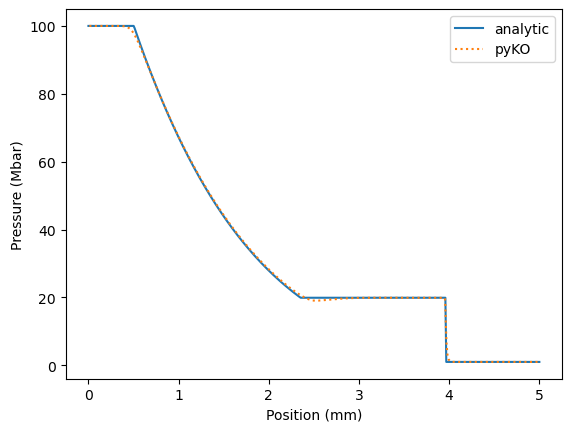

In [18]:
plt.plot(values['x'],values['p'],label='analytic') # analytic Sod Test solution
plt.xlabel('Position (mm)')
plt.ylabel('Pressure (Mbar)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
plt.plot(pko["pos"][pindex],pko["pres"][pindex]/100,':',label='pyKO') # GPa to Mbar
plt.legend()

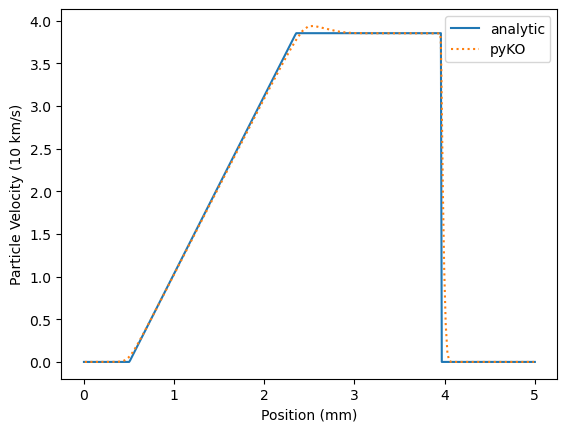

In [19]:
plt.plot(values['x'],values['u'],label='analytic')
plt.xlabel('Position (mm)')
plt.ylabel('Particle Velocity (10 km/s)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
plt.plot(pko["pos"][pindex],pko["up"][pindex]/1.e4,':',label='pyKO')
plt.legend()

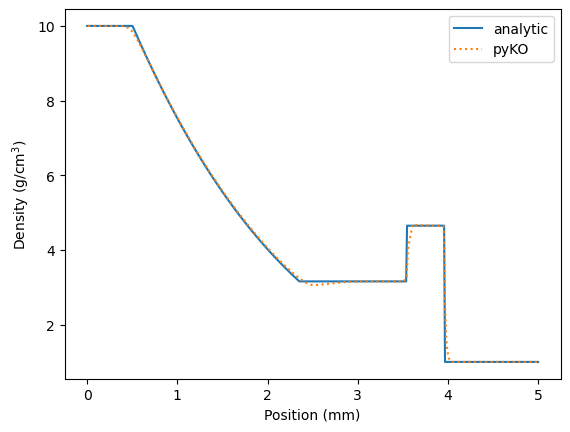

In [20]:
plt.plot(values['x'],values['rho'],label='analytic')
plt.xlabel('Position (mm)')
plt.ylabel(r'Density (g/cm$^3$)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
plt.plot(pko["pos"][pindex],pko["rho"][pindex],':',label='pyKO')
plt.legend()

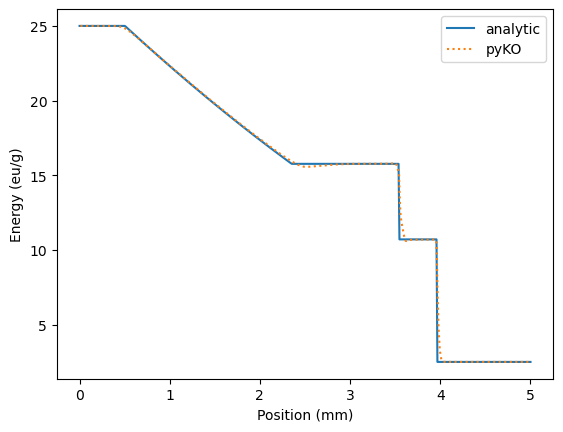

In [21]:
plt.plot(values['x'],values['energy'],label='analytic')
plt.xlabel('Position (mm)')
plt.ylabel('Energy (eu/g)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
plt.plot(pko["pos"][pindex],pko["iev0"][pindex]/pko["rho0"][pindex],':',label='pyKO')
plt.legend()

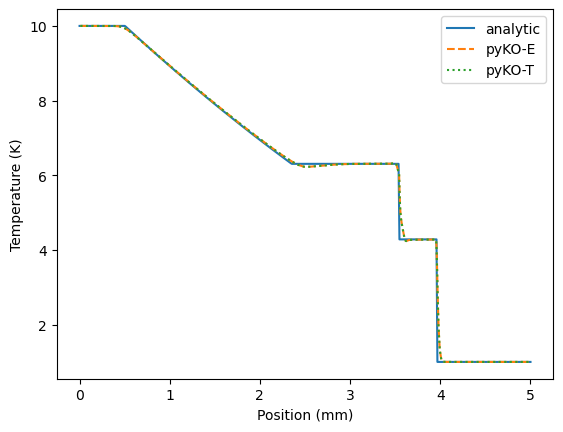

In [22]:
# x is an array from 0 to 5 with original boundary at 2; 500 points
tempsod = np.zeros(500)
tempsod[0:200] = values['energy'][0:200]/2.5 # cv in eu/g
tempsod[200::] = values['energy'][200::]/2.5 # cv in eu/g

ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]


pkotemp = pko["iev0"][pindex]
imat1 = pindex[np.where(pko["mat"][pindex] == 1)[0]]
#print(imat1)
#print(len(imat1))
pkotemp[imat1] = pko["iev0"][imat1]/25. # pyKO units
imat2 = pindex[np.where(pko["mat"][pindex] == 2)[0]]
pkotemp[imat2] = pko["iev0"][imat2]/2.5 # pyKO units

plt.plot(values['x'],tempsod,label='analytic')
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (K)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
plt.plot(pko["pos"][pindex],pkotemp,'--',label='pyKO-E')
plt.plot(pko["pos"][pindex],pko["temp"][pindex],':',label='pyKO-T')
plt.legend()

## Run Fortran KO 

### Compile fortran KO

Compile at the command line; an example Makefile is provided.


In [23]:
filein = 'test2/test2-idg.in'
fkofileout = 'test2/fko-test2-idg.dat'
# assumes path to fortran KO is one directory up
%time os.system('../kov11e '+filein+' '+fkofileout)

 test2/test2-idg.in                      test2/fko-test2-idg.dat                    0.0000000000000000     
 input file: test2/test2-idg.in                      
 EOS input
   1   2 200     2.0000     0.0000   100.0000     0.0000    10.0000   250.0000     0.0000     0.0000     0.0000     0.0000     1.4000     0.0000     0.0000  0.0000E+00  0.2500E+02
   2   2 300     3.0000     2.0000     1.0000     0.0000     1.0000     2.5000     0.0000     0.0000     0.0000     0.0000     1.4000     0.0000     0.0000  0.0000E+00  0.2500E+01
  
 Boundary Conditions
  -4  0.000  0.000  0.000  0.000  1.000
   4  0.000  0.000  0.000  0.000  1.000
 output file: test2/fko-test2-idg.dat                 
 Start Main Loop,  goto tstop =   0.40000000000000002     
 Fortran KO time in main loop =   0.93842799999999993     
 *******************  Finished!!  ******************
CPU times: user 851 µs, sys: 1.38 ms, total: 2.23 ms
Wall time: 951 ms


0

## Load Fortran KO results

In [24]:
# read the data file: ko-fort.dat
# this is a dump of each node for each time step and has a shape of [(nodes x timesteps), # output variables]
# it is faster to read an ascii file all at once rather than line by line
# this formulation of opening a file will automatically close the file
# see https://www.statology.org/with-open-python/
with open(fkofileout) as f:
    fko = pd.read_csv(f, delimiter=r"\s+") # read into a Pandas array; stsm added headers to the output file

# convert to plotting units 
# 
fko['pres'] *= 100. # Mbar to GPa                  
fko['up'] *= 10000. # cm/us to m/s particle velocity
fko['sigmar'] *= 100 # Mbar to GPa total normal stress
fko['sigmao'] *= 100 # Mbar to GPa
# check energies
print('KE+IE zeroth output time, final output time:', fko['etot'][0],fko['etot'][np.where(fko['time']>0.)[0][-1]])
print('KE+IE ratio (final/zeroth):', fko['etot'][np.where(fko['time']>0.)[0][-1]]/fko['etot'][0])
print('KE+IE first output time, final output time:', fko['etot'][np.where(fko['time']>0.)[0][0]],fko['etot'][np.where(fko['time']>0.)[0][-1]])
print('KE+IE ratio (final/first):', fko['etot'][np.where(fko['time']>0.)[0][-1]]/fko['etot'][np.where(fko['time']>0.)[0][0]])


KE+IE zeroth output time, final output time: 507.5 507.48283
KE+IE ratio (final/zeroth): 0.9999661674876846
KE+IE first output time, final output time: 507.23976 507.48283
KE+IE ratio (final/first): 1.000479201393834


In [25]:
fko.hvplot.scatter(x='pos',y='pres',groupby='time',by='mat',hover_cols=['all'],
                       title='fKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Pressure (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (pres)

In [26]:
fko.hvplot.scatter(x='pos',y='iev0',groupby='time',by='mat',hover_cols=['all'],
                       title='fKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='iev0 (eu/cm3)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (iev0)

In [27]:
fko.hvplot.scatter(x='pos',y='up',groupby='time',by='mat',hover_cols=['all'],
                       title='fKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Particle Velocity (m/s)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (up)

In [28]:
fko.hvplot.scatter(x='pos',y='rho',groupby='time',by='mat',hover_cols=['all'],
                       title='fKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Density (g/cm3)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (rho)

In [29]:
fko.hvplot.scatter(x='pos',y='temp',groupby='time',by='mat',hover_cols=['all'],
                       title='fKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Temperature (K)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (temp)

## Compare Python and Fortran KO results

In [30]:
title='Test 2'

# select a range of time; plots will be versus the Pandas data frame index number in this time range
# the f/pindex corresponds to index position in the dataframe, which correspond to the spatial dimension
t1 = 0.37 # microsec
t2 = 0.41 # microsec

ftime = np.unique(fko["time"])
ftime = np.delete(ftime,-1)
ptime = np.unique(pko["time"])
fsteps = np.unique(fko["step"])
psteps = np.unique(pko["stepn"])
findex = np.where((fko["time"] > t1) & (fko["time"] < t2))[0]
findex = findex-findex[0]
pindex = np.where((pko["time"] > t1) & (pko["time"] < t2))[0]
pindex = pindex-pindex[0]
print('Number of elements in selected time window (fKO, pKO): ',len(findex),len(pindex))
print('Number of elements in time arrays (fKO, pKO): ',len(ftime),len(ptime))

#print(ftime,ptime)

Number of elements in selected time window (fKO, pKO):  1004 1000
Number of elements in time arrays (fKO, pKO):  41 41


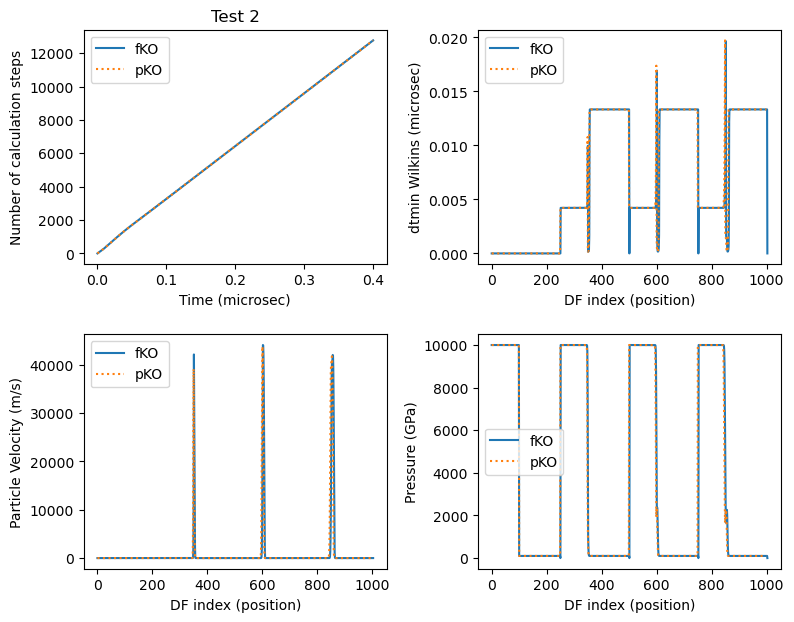

In [31]:

plt.rcParams["figure.figsize"] = (9,7)

figb, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

axs[0,0].set_xlabel('Time (microsec)')
axs[0,0].set_ylabel('Number of calculation steps')


axs[0,1].set_xlabel('DF index (position)')
axs[0,1].set_ylabel('dtmin Wilkins (microsec)')


axs[1,1].set_xlabel('DF index (position)')
axs[1,1].set_ylabel('Pressure (GPa)')

axs[1,0].set_xlabel('DF index (position)')
axs[1,0].set_ylabel('Particle Velocity (m/s)')

# add title of the problem and time to the top of the plot
axs[0,0].set_title(title)

fig00a,=axs[0,0].plot(fko["time"],fko["step"],label='fKO')
fig00b,=axs[0,0].plot(pko["time"],pko["stepn"],':',label='pKO')
axs[0,0].legend()

fig01a,=axs[0,1].plot(fko["dtminj"][findex],label='fKO')
fig01b,=axs[0,1].plot(pko["dtminj"][pindex],':',label='pKO')
axs[0,1].legend()

fig11a,=axs[1,1].plot(fko["pres"][findex],label='fKO')
fig11b,=axs[1,1].plot(pko["pres"][pindex],':',label='pKO')
axs[1,1].legend()

fig10a,=axs[1,0].plot(fko["up"][findex],label='fKO')
fig10b,=axs[1,0].plot(pko["up"][pindex],':',label='pKO')
axs[1,0].legend()

#res = norm(fko["P"][findex].values-pko["P"][pindex].values,2)
##print(res)
#res = norm(fko["up"][findex].values-pko["up"][pindex].values,2)
#print(res)
#res = norm(fko["P"][findex].values-pko["P"][pindex].values,2)
#print(res)


41 41
41 41


Text(0, 0.5, 'Temperature (K)')

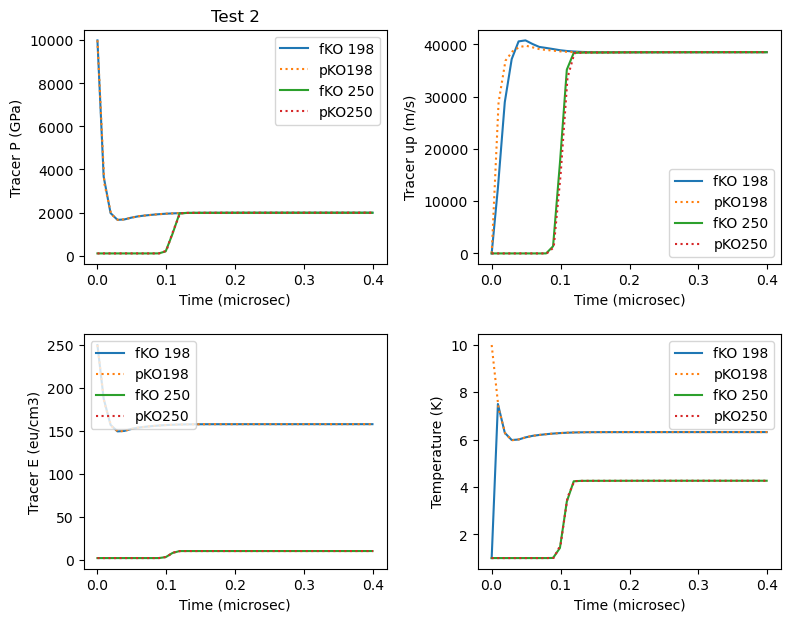

In [32]:
jtarr = [198, 250]
findex0 = np.where((fko["j"] == jtarr[0]))[0]
pindex0 = np.where((pko["j"] == jtarr[0]+1))[0]
if len(findex0) > len(pindex0):
    findex0 = np.delete(findex0,-1)
if len(pindex0) > len(findex0):
    pindex0 = np.delete(pindex0,-1)
print(len(findex0),len(pindex0))

findex1 = np.where((fko["j"] == jtarr[1]))[0]
pindex1 = np.where((pko["j"] == jtarr[1]+1))[0]
if len(findex1) > len(pindex1):
    findex1 = np.delete(findex1,-1)
if len(pindex1) > len(findex1):
    pindex1 = np.delete(pindex1,-1)
print(len(findex1),len(pindex1))

plt.rcParams["figure.figsize"] = (9,7)

figb, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# add title of the problem and time to the top of the plot
axs[0,0].set_title(title)

axs[0,0].plot(ftime,fko["pres"][findex0],label='fKO '+str(jtarr[0]))
axs[0,0].plot(ptime,pko["pres"][pindex0],':',label='pKO'+str(jtarr[0]))
axs[0,0].plot(ftime,fko["pres"][findex1],label='fKO '+str(jtarr[1]))
axs[0,0].plot(ptime,pko["pres"][pindex1],':',label='pKO'+str(jtarr[1]))
axs[0,0].legend()
axs[0,0].set_xlabel('Time (microsec)')
axs[0,0].set_ylabel('Tracer P (GPa)')

axs[0,1].plot(ftime,fko["up"][findex0],label='fKO '+str(jtarr[0]))
axs[0,1].plot(ptime,pko["up"][pindex0],':',label='pKO'+str(jtarr[0]))
axs[0,1].plot(ftime,fko["up"][findex1],label='fKO '+str(jtarr[1]))
axs[0,1].plot(ptime,pko["up"][pindex1],':',label='pKO'+str(jtarr[1]))
axs[0,1].legend()
axs[0,1].set_xlabel('Time (microsec)')
axs[0,1].set_ylabel('Tracer up (m/s)')

axs[1,0].plot(ftime,fko["iev0"][findex0],label='fKO '+str(jtarr[0]))
axs[1,0].plot(ptime,pko["iev0"][pindex0],':',label='pKO'+str(jtarr[0]))
axs[1,0].plot(ftime,fko["iev0"][findex1],label='fKO '+str(jtarr[1]))
axs[1,0].plot(ptime,pko["iev0"][pindex1],':',label='pKO'+str(jtarr[1]))
axs[1,0].legend()
axs[1,0].set_xlabel('Time (microsec)')
axs[1,0].set_ylabel('Tracer E (eu/cm3)')

axs[1,1].plot(ftime,fko["temp"][findex0],label='fKO '+str(jtarr[0]))
axs[1,1].plot(ptime,pko["temp"][pindex0],':',label='pKO'+str(jtarr[0]))
axs[1,1].plot(ftime,fko["temp"][findex1],label='fKO '+str(jtarr[1]))
axs[1,1].plot(ptime,pko["temp"][pindex1],':',label='pKO'+str(jtarr[1]))
axs[1,1].legend()
axs[1,1].set_xlabel('Time (microsec)')
axs[1,1].set_ylabel('Temperature (K)')


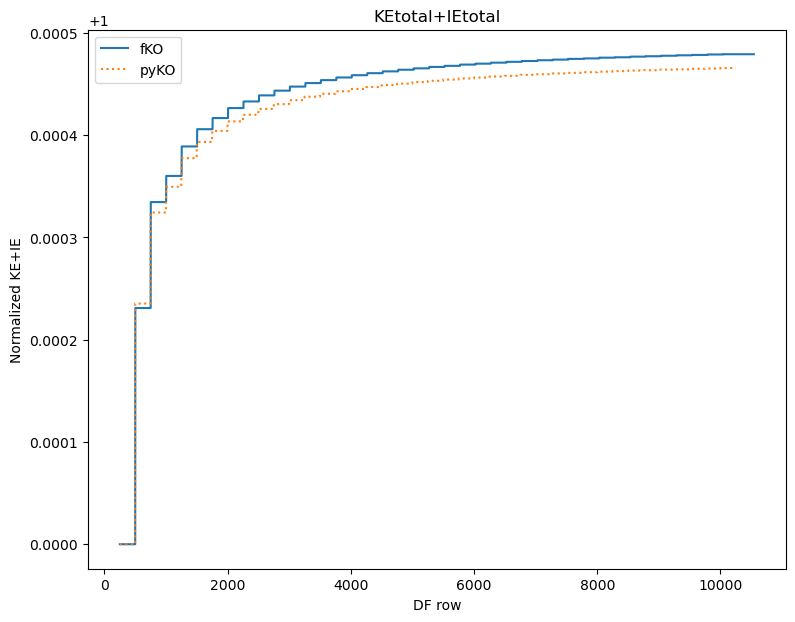

In [33]:
istart = np.where(fko['time']>0.)[0]
plt.plot(fko["etot"][istart]/fko["etot"][istart[0]],label='fKO')
istart = np.where(pko['time']>0.)[0]
plt.plot(pko["etot"][istart]/pko["etot"][istart[0]],':',label='pyKO')
plt.xlabel('DF row')
plt.title('KEtotal+IEtotal')
plt.ylabel('Normalized KE+IE')
plt.legend()


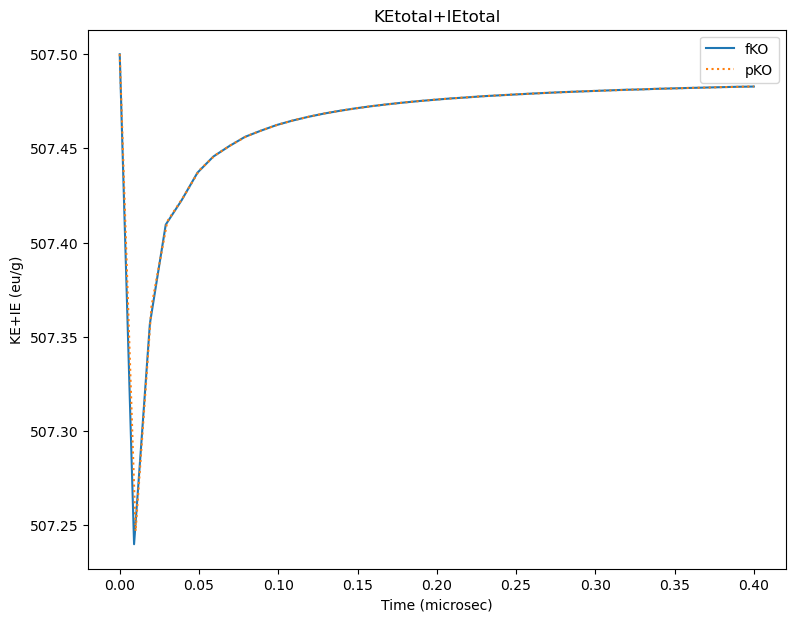

In [34]:
plt.plot(fko['time'],fko['etot'],label='fKO')
plt.plot(pko['time'],pko['etot'],':',label='pKO')
plt.xlabel('Time (microsec)')
plt.title('KEtotal+IEtotal')
plt.ylabel('KE+IE (eu/g)')
plt.legend()


End of notebook